In [1]:
"""
Learning word vectors from Sherlock Holmes series

Patrick Coady (pcoady@alum.mit.edu)
"""

from wordvector import WordVector
from windowmodel import WindowModel
import docload
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
# UNCOMMENT below to load and process a document for first time

files = ['../data/adventures_of_sherlock_holmes.txt',
        '../data/hound_of_the_baskervilles.txt',
        '../data/sign_of_the_four.txt']
word_array, dictionary, (num_lines, num_words) = docload.build_word_array(
    files, vocab_size=50000, gutenberg=True)
# save processed book for quick future load
docload.save_word_array('../data/aofsh', word_array, dictionary)

print('Document loaded and processed: {} lines, {} words.'
      .format(num_lines, num_words))

Document loaded and processed: 24080 lines, 244986 words.


In [3]:
## UNCOMMENT below to load previously processed book
## aofsh = previously processed Adventures of Sherlock Holmes

# word_array, dictionary = docload.load_word_array('../data/aofsh')

In [4]:
print('Building training set ...')
x, y = WindowModel.build_training_set(word_array)

# shuffle and split 10% validation data
x, y = shuffle(x, y, random_state=0)
split = round(x.shape[0]*0.9)
x_val, y_val = (x[split:, :], y[split:, :])
x, y = (x[:split, :], y[:split, :])

print('Training set built.')
graph_params = {'batch_size': 32,
                'vocab_size': np.max(x)+1,
                'embed_size': 64,
                'hid_size': 128,
                'neg_samples': 64,
                'learn_rate': 0.002}
model = WindowModel(graph_params)
print('Model built. Vocab size = {}. Document length = {} words.'
      .format(np.max(x)+1, len(word_array)))

print('Training ...')
embed_weights1, embed_weights2 = model.train(x, y, x_val, y_val, epochs=30)

word_vector1 = WordVector(embed_weights1, dictionary)
word_vector2 = WordVector(embed_weights2, dictionary)

Building training set ...
Training set built.
Model built. Vocab size = 11750. Document length = 244986 words.
Training ...
epoch 1: total batches = 6890. Ein = 90.95, Eout = 52.59
epoch 2: total batches = 13780. Ein = 38.49, Eout = 28.61
epoch 3: total batches = 20670. Ein = 21.90, Eout = 17.00
epoch 4: total batches = 27560. Ein = 13.58, Eout = 10.95
epoch 5: total batches = 34450. Ein = 9.16, Eout = 7.80
epoch 6: total batches = 41340. Ein = 6.95, Eout = 6.27
epoch 7: total batches = 48230. Ein = 5.88, Eout = 5.55
epoch 8: total batches = 55120. Ein = 5.34, Eout = 5.19
epoch 9: total batches = 62010. Ein = 5.06, Eout = 5.02
epoch 10: total batches = 68900. Ein = 4.90, Eout = 4.88
epoch 11: total batches = 75790. Ein = 4.74, Eout = 4.61
epoch 12: total batches = 82680. Ein = 4.52, Eout = 4.50
epoch 13: total batches = 89570. Ein = 4.28, Eout = 4.21
epoch 14: total batches = 96460. Ein = 4.05, Eout = 3.98
epoch 15: total batches = 103350. Ein = 3.86, Eout = 3.90
epoch 16: total batche

In [5]:
print('100 most common words')
print(word_vector1.most_common(100))

100 most common words
[',', '.', 'the', '"', 'and', 'i', 'of', 'to', 'a', 'that', 'it', 'in', 'he', 'you', 'was', 'his', 'is', 'my', 'have', 'had', 'with', 'as', 'at', '?', 'for', 'which', 'we', 'but', 'be', 'not', 'me', 'this', 'there', 'upon', 'him', 'said', 'from', 'so', 'no', 'on', 'one', 'all', 'holmes', 'been', 'her', 'were', 'what', 'very', 'by', 'your', 'an', 'she', 'are', 'would', '!', 'man', 'out', 'could', 'then', 'if', 'our', 'up', 'when', 'has', 'do', 'will', "'", 'us', 'who', 'some', 'into', 'sir', 'now', 'see', 'down', 'or', 'they', 'should', 'little', 'mr', 'well', 'more', 'over', 'can', 'may', 'know', 'about', 'am', 'think', 'them', 'only', 'must', 'did', 'come', 'here', 'time', 'than', 'how', 'two', 'before']


In [10]:
word = "her"
print('10 closest words to: "', word, '". (based on cosine similarity)')
print(word_vector1.n_closest(word=word, num_closest=10, metric='cosine'))

10 closest words to: " her ". (based on cosine similarity)
['his', 'my', 'your', 'its', 'our', 'their', 'him', 'me', 'some', 'merripit']


In [11]:
word = "lord"
print('10 closest words to: "', word, '". (based on cosine similarity)')
print(word_vector2.n_closest(word=word, num_closest=10, metric='cosine'))

10 closest words to: " lord ". (based on cosine similarity)
['neville', 'rough', 'mordecai', 'laura', "god's", 'supreme', "clair's", 'sheer', 'trafalgar', "'one"]


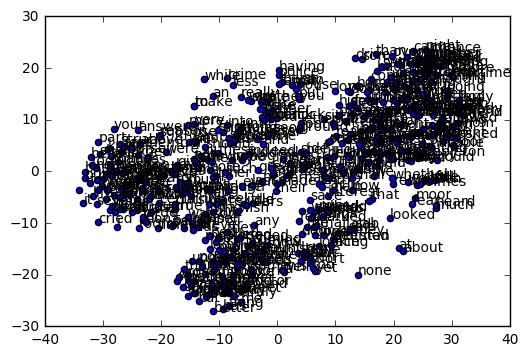

In [33]:
embed_2d, word_list = word_vector2.project_2d(200, 700)
reverse_dict = word_vector2.get_reverse_dict()
minx, maxx, miny, maxy = (-10, 0, 20, 30)
# plt.ylim(miny, maxy)
# plt.xlim(minx, maxx)
plt.scatter(embed_2d[:,0], embed_2d[:,1])
for i in range(500):
    plt.text(embed_2d[i,0], embed_2d[i,1], reverse_dict[i], clip_on=True)
plt.show()

In [13]:
word_vector2.analogy('gentleman', 'lady', 'lord', 5)

['lord', 'neville', 'lady', 'rough', 'briony']

In [17]:
help(plt.axes)

Help on function axes in module matplotlib.pyplot:

axes(*args, **kwargs)
    Add an axes to the figure.
    
    The axes is added at position *rect* specified by:
    
    - ``axes()`` by itself creates a default full ``subplot(111)`` window axis.
    
    - ``axes(rect, axisbg='w')`` where *rect* = [left, bottom, width,
      height] in normalized (0, 1) units.  *axisbg* is the background
      color for the axis, default white.
    
    - ``axes(h)`` where *h* is an axes instance makes *h* the current
      axis.  An :class:`~matplotlib.axes.Axes` instance is returned.
    
    =======   ==============   ==============================================
    kwarg     Accepts          Description
    =======   ==============   ==============================================
    axisbg    color            the axes background color
    frameon   [True|False]     display the frame?
    sharex    otherax          current axes shares xaxis attribute
                               with othera